<h2 style="color:darkred;font-size:25px">Projet 6 : Classifiez automatiquement des biens de consommation</h2>

<img src="support/logo.png" style="width: 350px;"/>

<h2 style="color:darkred;font-size:25px">Notebook 1 : Natural Language Processing (Traitement Automatique du Langage Naturel)</h2>

---
---
---

<h2 style="color:darkred;font-size:20px">Projet</h2>

Vous êtes Data Scientist au sein de l’entreprise "Place de marché”, qui souhaite lancer une marketplace e-commerce.

Sur la place de marché, des vendeurs proposent des articles à des acheteurs en postant une photo et une description.

Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs et est donc peu fiable. De plus, le volume des articles est pour l’instant très petit.

Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible et dans l'optique d'un passage à l'échelle, il devient nécessaire d'automatiser cette tâche.

Linda, lead data scientist, vous demande donc d'étudier la faisabilité d'un moteur de classification des articles en différentes catégories, avec un niveau de précision suffisant.

<h2 style="color:darkred;font-size:20px">Dataset resource</h2>

Linda vous a fourni un premier jeu de données d’articles avec le lien pour télécharger la photo et une description associée.

https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+prétraitement+textes+images.zip

<h2 style="color:darkred;font-size:20px">L'objectif</h2>

Votre mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article.

Vous analyserez le jeu de données en réalisant un prétraitement des images et des descriptions des produits, une réduction de dimension, puis un clustering. Les résultats du clustering seront présentés sous la forme d’une représentation en deux dimensions à déterminer, qui ’illustrera le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.

La représentation graphique vous aidera à convaincre Linda que cette approche de modélisation permettra bien de regrouper des produits de même catégorie.

<h2 style="color:darkred;font-size:20px">Contraintes</h2>

- Linda vous a communiqué la contrainte suivante : afin d’extraire les features, mettre en œuvre a minima un algorithme de type SIFT / ORB / SURF.

- Un algorithme de type CNN Transfer Learning peut éventuellement être utilisé en complément, s’il peut apporter un éclairage supplémentaire à la démonstration.

<h2 style="color:darkred;font-size:20px">Sommaire</h2>
    
    Notebook 1  _______________________ Natural Language Processing ______________________
    
    1. Données d'entrées
        1.1. Téléchargement du jeux de données
        1.2. Les deux catégories principales de produits
        
    2. Traitement de la colonne "Description"
        2.1. Tokenization via la bibliothèque NLTK
        2.2. Suppression des stopwords
        2.3. Stemming / Lemmatisation
        
    3. Modèles supervisés (RégLog.) et non supervisés (LDA) avec TF-IDF
        3.1. Vectorisation
        3.2. Régression logistique (TF_IDF vectorisation)
        3.3. LDA (Latent Dirichlet Allocation)
    
    4. Régression Logistique via Word Embeddings (Plongement de mots)
        4.1. Régression logistique (L'embedding Glove 50d)
        4.2. Régression logistique (L'embedding Glove 100d)
        4.3. Régression logistique (L'embedding Glove 200d)
        4.4. Régression logistique (L'embedding Glove 300d)
        
    5. RNN (Recurrent Neural Networks) - Reseau de neurons
    
    Notebook 2 ____ Computer Vision via SIFT et ORB (non supervisé) ____________________________
    
    Notebook 3 ____ Computer Vision via Deep Learning __________________________________________
    
    Notebook 4 ____ Computer Vision via Transfer Learning ______________________________________
    
    Notebook 5 ____ Modèle final _______________________________________________________________



# 1. Données d'entrées

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# quelques arrangements pour jupyter

# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1. Téléchargement du jeux de données

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P6/data/flipkart_com-ecommerce_sample_1050.csv')
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


## 1.2. Les deux catégories principales de produits

- Il s'agit de la colonne **"product_category_tree"**
- Il compte 7 sous-catégories

#### La catégorie principale :

In [5]:
data['categorie_1'] = data['product_category_tree'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
data['categorie_1']

0       Home Furnishing
1             Baby Care
2             Baby Care
3       Home Furnishing
4       Home Furnishing
             ...       
1045          Baby Care
1046          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: categorie_1, Length: 1050, dtype: object

#### On peut séparer toutes les sous-catégories :

In [6]:
categories = data['product_category_tree'].str.split('>>', expand=True)
categories.head(5)

,0,1,2,3,4,5,6
0,"[""Home Furnishing",Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,None,None,None
1,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",None,None
2,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,None,None
3,"[""Home Furnishing",Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,None,None
4,"[""Home Furnishing",Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,None,None


#### Prenons la deuxième :

In [7]:
data['categorie_2'] = data['product_category_tree'].str.split('>>', expand=True)[1]
data['categorie_2']

0        Curtains & Accessories 
1              Baby Bath & Skin 
2              Baby Bath & Skin 
3                     Bed Linen 
4                     Bed Linen 
                  ...           
1045          Baby & Kids Gifts 
1046          Baby & Kids Gifts 
1047          Baby & Kids Gifts 
1048          Baby & Kids Gifts 
1049          Baby & Kids Gifts 
Name: categorie_2, Length: 1050, dtype: object

In [8]:
data['categorie_2'].nunique()

63

La troisème catégorie compte 246 valeurs, alors elle n'est pas exploitable. On l'ignore.

In [9]:
data['product_category_tree'].str.split('>>', expand=True)[2].nunique()

246

#### Visualisation des deux catégories principales en bar plots :

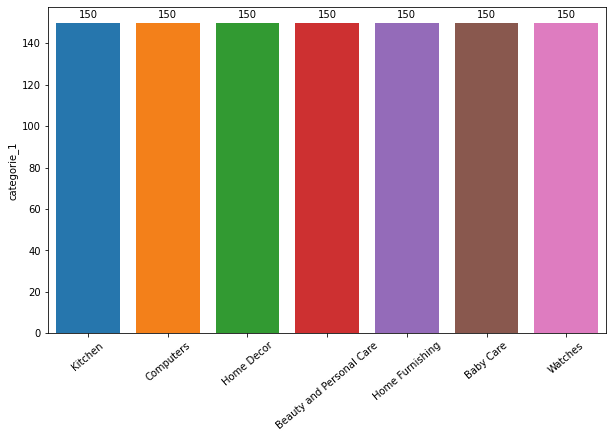

In [10]:
fig = plt.figure(figsize=(10, 6))
plt.xticks(rotation=40)
bp = sns.barplot(
    x=data['categorie_1'].value_counts().index,
    y=data['categorie_1'].value_counts(),
    data=data,
    saturation=0.9,
    # order=order,
    # color='darkred',
    ci=None)

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

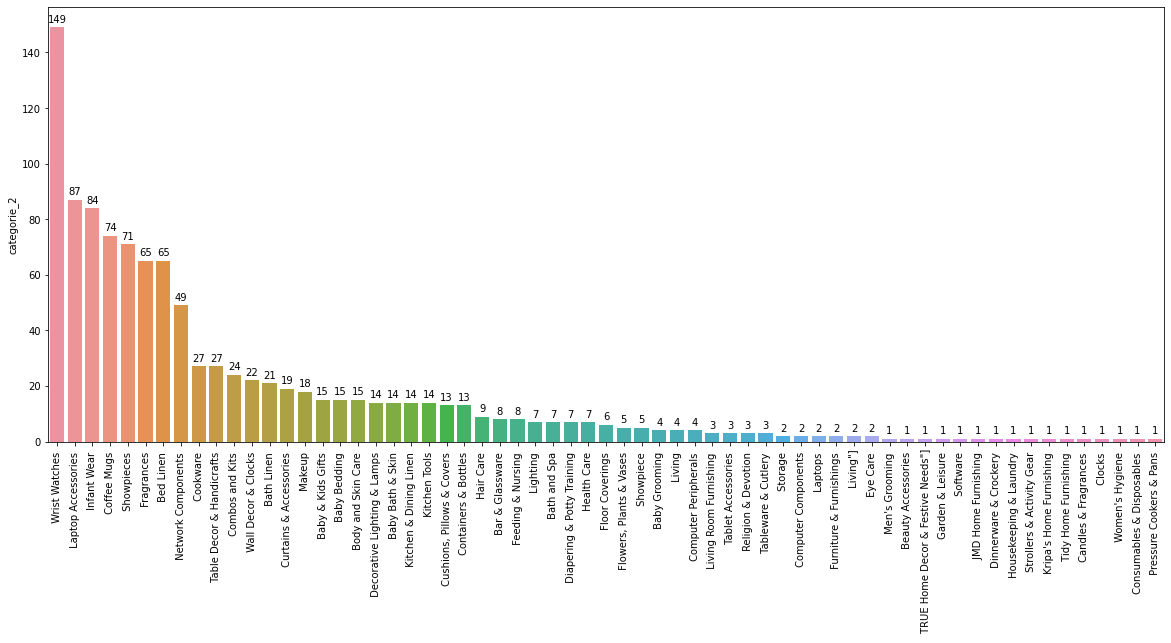

In [11]:
fig = plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
bp = sns.barplot(
    x=data['categorie_2'].value_counts().index,
    y=round(data['categorie_2'].value_counts()),
    data=data,
    saturation=0.8,
    # order=order,
    # color='darkred',
    ci=None)

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

# 2. Traitement de la colonne "Description"

In [12]:
data['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

#### Aperçu des descriptions 

In [13]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [14]:
for i in range(5):
    print('\n# {}. {}\n'.format(i, data['categorie_1'][i]))
    print(data['description'][i])
    print("----------------------" * 5)


# 0. Home Furnishing

Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in

#### Convertir tous les caractères majuscules en minuscules

In [15]:
data['description'] = data['description'].str.lower()

## 2.1. Tokenization via la bibliothèque NLTK

Documentation NLTK : https://www.nltk.org

Alternative spaCY : https://spacy.io _(peut-être mieux que NLTK)_

GENSIM : https://radimrehurek.com/gensim/auto_examples/index.html#documentation

In [16]:
import nltk

In [17]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z]+')

# C'est mieux que "word_tokenize" parce qu'il enlève également les nombres

In [18]:
tous_desc = ' '.join(desc for desc in data['description'])

tous_desc_tokenized = tokenizer.tokenize(tous_desc)
print(len(tous_desc_tokenized))

76870


In [19]:
data['tokenized_desc'] = data.apply(lambda row: tokenizer.tokenize(row['description']), axis=1)

In [20]:
data['tokenized_desc']

0       [key, features, of, elegance, polyester, multi...
1       [specifications, of, sathiyas, cotton, bath, t...
2       [key, features, of, eurospa, cotton, terry, fa...
3       [key, features, of, santosh, royal, fashion, c...
4       [key, features, of, jaipur, print, cotton, flo...
                              ...                        
1045    [oren, empower, extra, large, self, adhesive, ...
1046    [wallmantra, large, vinyl, sticker, sticker, p...
1047    [buy, uberlyfe, extra, large, pigmented, polyv...
1048    [buy, wallmantra, medium, vinyl, sticker, stic...
1049    [buy, uberlyfe, large, vinyl, sticker, for, rs...
Name: tokenized_desc, Length: 1050, dtype: object

In [21]:
type(data['tokenized_desc'][0])

list

In [22]:
def list_to_string (l):
    string = ''.join(l)
    string = string.replace(' ', ', ')
    return string

def string_to_list(string):
    l = list(string.split(", "))
    return l

In [23]:
data['tokenized_desc_0'] = data.apply(lambda row: list_to_string(row['description']), axis=1)

In [24]:
data['tokenized_desc_0']

0       key, features, of, elegance, polyester, multic...
1       specifications, of, sathiyas, cotton, bath, to...
2       key, features, of, eurospa, cotton, terry, fac...
3       key, features, of, santosh, royal, fashion, co...
4       key, features, of, jaipur, print, cotton, flor...
                              ...                        
1045    oren, empower, extra, large, self, adhesive, s...
1046    wallmantra, large, vinyl, sticker, sticker, (p...
1047    buy, uberlyfe, extra, large, pigmented, polyvi...
1048    buy, wallmantra, medium, vinyl, sticker, stick...
1049    buy, uberlyfe, large, vinyl, sticker, for, rs....
Name: tokenized_desc_0, Length: 1050, dtype: object

In [25]:
type(data['tokenized_desc_0'][0])

str

In [26]:
def top_words(df, column, nb_top):
    count_keyword = dict()
    for index, col in df[column].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else:
                count_keyword[word] = 1

    keyword_top = []
    for k, v in count_keyword.items():
        keyword_top.append([k, v])
    keyword_top.sort(key=lambda x: x[1], reverse=True)

    return keyword_top[:nb_top]

from wordcloud import WordCloud

from PIL import Image
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/P6/support/w_wine.png'))
 
def plot_world_cloud(df,
                     column,
                     nb_top):
    fig = plt.figure(1, figsize=(18, 12))
    ax1 = fig.add_subplot(1, 1, 1)

    words = dict()
    trunc_occurences = top_words(df, column, nb_top)
    for s in trunc_occurences:
        words[s[0]] = s[1]

    word_cloud = WordCloud(width=1000,
                           height=600,
                           normalize_plurals=False,
                           background_color='#424342',
                           colormap='Set2',
                           random_state=4
                           # mask=mask
                          )
    word_cloud.generate_from_frequencies(words)
    ax1.imshow(word_cloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title("Nuage de mots dans la colonne {} (top {}) \n".format(
        column, nb_top),
              fontdict=font)
    plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


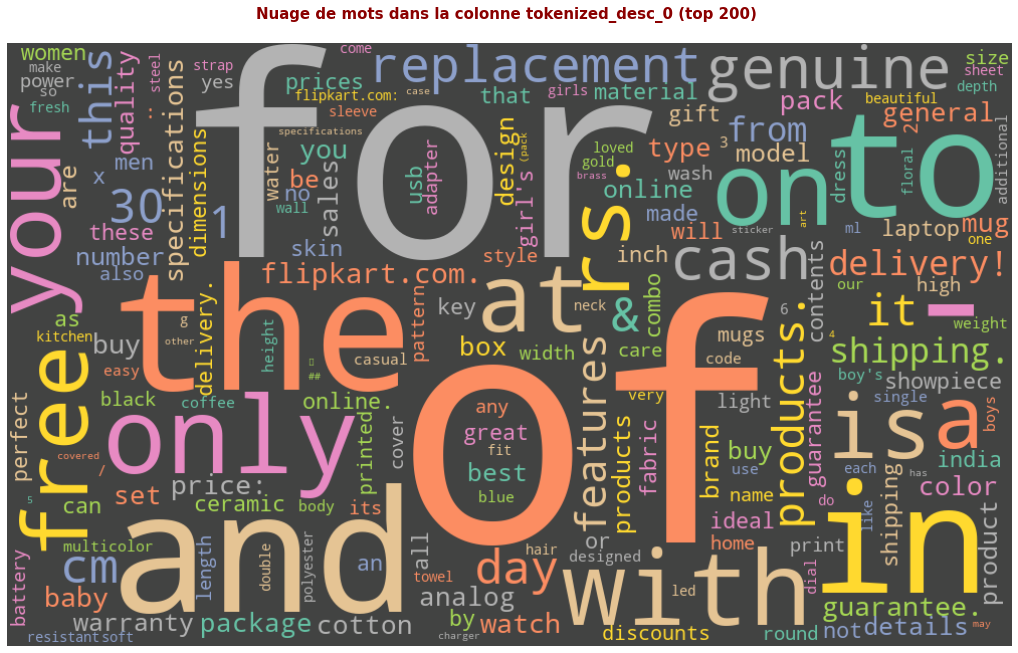

In [27]:
plot_world_cloud(df=data, column="tokenized_desc_0", nb_top=200)

## 2.2. Suppression des stopwords

In [28]:
# suppresion des stopwords
# suppression de la ponctuation

from nltk.corpus import stopwords

nltk.download("punkt") # punctuation
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

data['clean_tokenized_desc'] = data['tokenized_desc'].apply(lambda x:[word for word in x if word not in stop_words and word.isalnum()])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
data['clean_tokenized_desc']

0       [key, features, elegance, polyester, multicolo...
1       [specifications, sathiyas, cotton, bath, towel...
2       [key, features, eurospa, cotton, terry, face, ...
3       [key, features, santosh, royal, fashion, cotto...
4       [key, features, jaipur, print, cotton, floral,...
                              ...                        
1045    [oren, empower, extra, large, self, adhesive, ...
1046    [wallmantra, large, vinyl, sticker, sticker, p...
1047    [buy, uberlyfe, extra, large, pigmented, polyv...
1048    [buy, wallmantra, medium, vinyl, sticker, stic...
1049    [buy, uberlyfe, large, vinyl, sticker, rs, onl...
Name: clean_tokenized_desc, Length: 1050, dtype: object

In [30]:
type(data['clean_tokenized_desc'][0])

list

In [31]:
def list_to_string_2 (l):
    string = ', '.join(l)
    #string = string.replace(' ', ', ')
    return string

In [32]:
data['clean_tokenized_desc_0'] = data.apply(lambda row: list_to_string_2(row['clean_tokenized_desc']), axis=1)

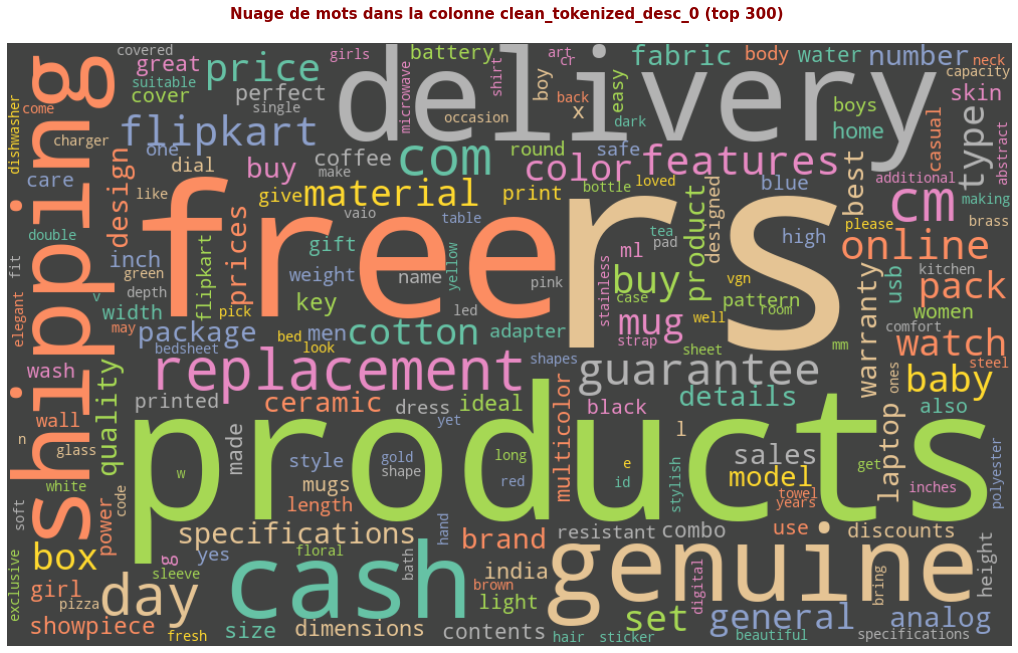

In [33]:
plot_world_cloud(df=data, column="clean_tokenized_desc_0", nb_top=300)

In [34]:
# Création d'un corpus non-stemmed

temp = list(data['clean_tokenized_desc'])

flat_list = [item for sublist in temp for item in sublist]

corpus_stem = sorted(set(flat_list))

In [35]:
freq_totale = nltk.Counter(flat_list)
most_common = freq_totale.most_common(100)

In [36]:
# most_common n'est pas une liste

list_of_most_common = []
for a_tuple in most_common:
    list_of_most_common.append(a_tuple[0])
    
# list_of_most_common donne la liste des mots top 100

list_of_most_common

['rs',
 'products',
 'free',
 'buy',
 'delivery',
 'genuine',
 'shipping',
 'cash',
 'replacement',
 'cm',
 'day',
 'flipkart',
 'com',
 'guarantee',
 'online',
 'features',
 'specifications',
 'price',
 'watch',
 'color',
 'mug',
 'baby',
 'pack',
 'material',
 'set',
 'type',
 'cotton',
 'box',
 'general',
 'package',
 'analog',
 'sales',
 'number',
 'warranty',
 'quality',
 'details',
 'product',
 'brand',
 'best',
 'model',
 'design',
 'key',
 'ceramic',
 'laptop',
 'fabric',
 'prices',
 'showpiece',
 'made',
 'great',
 'perfect',
 'inch',
 'india',
 'men',
 'size',
 'usb',
 'x',
 'dimensions',
 'ideal',
 'girl',
 'home',
 'skin',
 'coffee',
 'multicolor',
 'contents',
 'combo',
 'water',
 'gift',
 'women',
 'printed',
 'discounts',
 'black',
 'ml',
 'width',
 'mugs',
 'wash',
 'also',
 'print',
 'g',
 'care',
 'blue',
 'cover',
 'power',
 'battery',
 'light',
 'l',
 'use',
 'adapter',
 'height',
 'yes',
 'pattern',
 'high',
 'style',
 'length',
 'one',
 'easy',
 'dress',
 'name',


In [37]:
data['better_clean_tokenized_desc'] = data['clean_tokenized_desc'].apply(lambda x:[word for word in x if word not in list_of_most_common])

In [38]:
data['better_clean_tokenized_desc']

0       [elegance, polyester, abstract, eyelet, door, ...
1       [sathiyas, bath, towel, bath, towel, red, yell...
2       [eurospa, terry, face, towel, small, gsm, euro...
3       [santosh, royal, fashion, king, sized, double,...
4       [jaipur, floral, king, sized, double, bedsheet...
                              ...                        
1045    [oren, empower, extra, large, self, adhesive, ...
1046    [wallmantra, large, vinyl, sticker, sticker, b...
1047    [uberlyfe, extra, large, pigmented, polyvinyl,...
1048    [wallmantra, medium, vinyl, sticker, sticker, ...
1049    [uberlyfe, large, vinyl, sticker, uberlyfe, la...
Name: better_clean_tokenized_desc, Length: 1050, dtype: object

In [39]:
data['better_clean_tokenized_desc_0'] = data.apply(lambda row: list_to_string_2(row['better_clean_tokenized_desc']), axis=1)

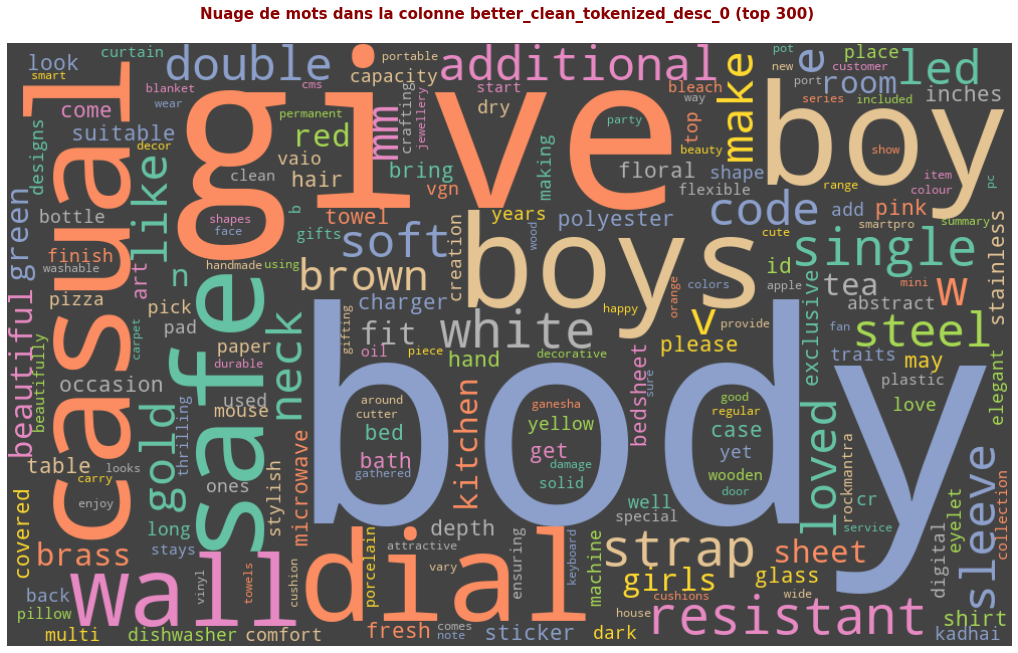

In [40]:
plot_world_cloud(df=data, column="better_clean_tokenized_desc_0", nb_top=300)

## 2.3. Stemming / Lemmatisation

In [41]:
# Stemming des tokens
# Racines

stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.wordnet.WordNetLemmatizer()

In [42]:
data['stemmed_better_clean_tokenized_desc'] = data.apply(lambda row : [stemmer.stem(w) for w in row['better_clean_tokenized_desc']], axis=1)

In [43]:
data['stemmed_better_clean_tokenized_desc']

0       [eleg, polyest, abstract, eyelet, door, curtai...
1       [sathiya, bath, towel, bath, towel, red, yello...
2       [eurospa, terri, face, towel, small, gsm, euro...
3       [santosh, royal, fashion, king, size, doubl, b...
4       [jaipur, floral, king, size, doubl, bedsheet, ...
                              ...                        
1045    [oren, empow, extra, larg, self, adhes, sticke...
1046    [wallmantra, larg, vinyl, sticker, sticker, br...
1047    [uberlyf, extra, larg, pigment, polyvinyl, fil...
1048    [wallmantra, medium, vinyl, sticker, sticker, ...
1049    [uberlyf, larg, vinyl, sticker, uberlyf, larg,...
Name: stemmed_better_clean_tokenized_desc, Length: 1050, dtype: object

In [44]:
data['stemmed_better_clean_tokenized_desc_0'] = data.apply(lambda row: list_to_string_2(row['stemmed_better_clean_tokenized_desc']), axis=1)

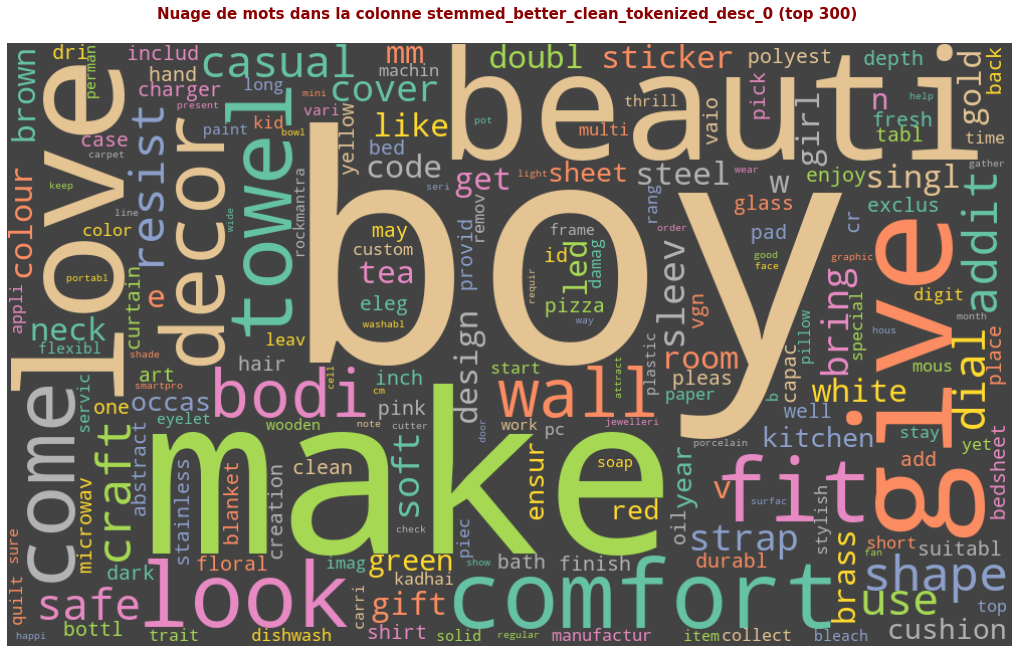

In [45]:
plot_world_cloud(df=data, column="stemmed_better_clean_tokenized_desc_0", nb_top=300)

In [46]:
# Longueur maximale des descriptions

max_length = max(data['tokenized_desc'].apply(lambda row : len(row)))
max_length

572

## Corpus

In [47]:
# id2word = corpora.Dictionary(data['tokenized_desc'])
corpus = data['tokenized_desc'].apply(list_to_string_2)

In [48]:
data['stemmed_better_clean_tokenized_desc'].apply(list_to_string_2)

0       eleg, polyest, abstract, eyelet, door, curtain...
1       sathiya, bath, towel, bath, towel, red, yellow...
2       eurospa, terri, face, towel, small, gsm, euros...
3       santosh, royal, fashion, king, size, doubl, be...
4       jaipur, floral, king, size, doubl, bedsheet, j...
                              ...                        
1045    oren, empow, extra, larg, self, adhes, sticker...
1046    wallmantra, larg, vinyl, sticker, sticker, bri...
1047    uberlyf, extra, larg, pigment, polyvinyl, film...
1048    wallmantra, medium, vinyl, sticker, sticker, w...
1049    uberlyf, larg, vinyl, sticker, uberlyf, larg, ...
Name: stemmed_better_clean_tokenized_desc, Length: 1050, dtype: object

# 3. Modèles supervisés (RégLog.) et non supervisés (LDA) avec TF-IDF 

## 3.1. Vectorisation

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [50]:
def CustomTokenizer(str_input) :
    tokens = tokenizer.tokenize(str_input)
    #tokens = [w for w in tokens if not w in list(sw)]
    tokens_stemmed = [stemmer.stem(token) for token in tokens]
    return tokens_stemmed

In [51]:
# Instanciation de l'algorithme TF-IDF

vectorizer = TfidfVectorizer(
    strip_accents= 'ascii',    
    tokenizer = CustomTokenizer
)

X = vectorizer.fit_transform(data['description'])
# X = vectorizer.fit_transform(data['stemmed_better_clean_tokenized_desc'].apply(list_to_string_2))

y = X.toarray()

In [52]:
# Création d'un dataframe avec les résultats

tfidf = pd.DataFrame(y, columns = vectorizer.get_feature_names())

tfidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,aa,aaa,aapno,aari,aarika,abil,abkl,abl,abod,about,abov,abras,abroad,absolut,absorb,abstract,abstrct,ac,accent,access,accessori,accid,accident,accommod,accomplish,accord,acer,ach,aci,acid,acl,acn,across,acryl,act,activ,actual,ad,adaa,adapt,adaptor,add,addict,addit,adf,adhes,adi,adida,adino,...,wrought,ws,wy,x,xa,xbatteri,xbluetooth,xemex,xl,xn,xp,xuser,xyz,y,yardley,yarn,ybscr,ye,year,yellow,yet,yg,ygskb,yiboo,yield,yk,yl,ym,york,you,young,your,yourself,youth,yr,yuva,yve,yx,zaicu,zero,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,0.023775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.152598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149257,0.0,0.047722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068229,0.000000,0.174116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050424,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.032658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.038273,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088375,0.0,0.023547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042295,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033933,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030167,0.0,0.024113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Mot ayant le score TF-IDF maximum par description

tfidf['topic'] = tfidf.apply(lambda row : tfidf.columns[row.argmax()], axis=1)

tfidf['topic']

0        curtain
1           bath
2          towel
3       bedsheet
4          sheet
          ...   
1045        wall
1046         the
1047        film
1048     sticker
1049     uberlyf
Name: topic, Length: 1050, dtype: object

In [54]:
new_top = tfidf['topic'].value_counts().head(7).to_frame()
new_top.style.background_gradient(cmap='Reds')

,topic
to,21
mug,20
coffe,12
skin,12
n,11
dress,9
raymond,8


## 3.2. Régression logistique (TF_IDF vectorisation)

In [55]:
X = vectorizer.fit_transform(data['description'])

y = data['categorie_1'].astype('category').cat.codes

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   shuffle=True,  
                                                   random_state=0)

In [57]:
# Entraînement et prédictions

clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9

Voyons les scores de la Régression Log. pour les étapes de preprocessing (après suppression stopwords, stemming etc.)

In [58]:
X = vectorizer.fit_transform(data['description'].apply(list_to_string_2))

y = data['categorie_1'].astype('category').cat.codes

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   shuffle=True,  
                                                   random_state=0)

In [60]:
# Entraînement et prédictions

clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5714285714285714

### Avec : clean_tokenized_desc

#### --> ça donne le meilleur resultat : 0.91

In [61]:
X = vectorizer.fit_transform(data['clean_tokenized_desc'].apply(list_to_string_2))

y = data['categorie_1'].astype('category').cat.codes

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   shuffle=True,  
                                                   random_state=0)

In [63]:
# Entraînement et prédictions

clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9142857142857143

### Avec : better_clean_tokenized_desc

In [64]:
X = vectorizer.fit_transform(data['better_clean_tokenized_desc'].apply(list_to_string_2))

y = data['categorie_1'].astype('category').cat.codes

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   shuffle=True,  
                                                   random_state=0)

In [66]:
# Entraînement et prédictions

clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8904761904761904

### Avec : stemmed_better_clean_tokenized_desc

In [67]:
X = vectorizer.fit_transform(data['stemmed_better_clean_tokenized_desc'].apply(list_to_string_2))

y = data['categorie_1'].astype('category').cat.codes

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   shuffle=True,  
                                                   random_state=0)

In [69]:
# Entraînement et prédictions

clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8904761904761904

## 3.3. LDA (Latent Dirichlet Allocation)

In [70]:
from sklearn.decomposition import LatentDirichletAllocation

In [71]:
n_topics = 7

In [72]:
# Instanciation

tf_vectorizer = CountVectorizer(max_df=0.95,
                                min_df=2,
                                max_features= 1000, 
                                stop_words ='english')
tf = tf_vectorizer.fit_transform(data['description'])

# On peut également essayer :
# tf = tf_vectorizer.fit_transform(data['stemmed_better_clean_tokenized_desc'].apply(list_to_string_2))

In [73]:
# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=7, random_state=0)

In [74]:
# Affichage des 10 top mots par sujet

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_vectorizer.get_feature_names(), 10)

Topic 0:
home hair price showpiece rs cm art towel beautiful brass
Topic 1:
warranty usb adapter power laptop battery replacement light product quality
Topic 2:
mug ceramic coffee perfect mugs gift material safe loved rockmantra
Topic 3:
skin oil traits shampoo wall ml soap type used applied
Topic 4:
products free rs delivery genuine shipping cash buy 30 day
Topic 5:
cm pack baby features color specifications general cotton package number
Topic 6:
laptop skin print shapes pad set mouse warranty combo multicolor


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [75]:
data['categorie_1'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches', 'Home Decor', 'Kitchen',
       'Beauty and Personal Care', 'Computers'], dtype=object)

**Le découpage proprosé par l'algorithme LDA ne correspond pas exactement tout à fait à nos labels. Par exemple, on peut remarquer que les topics 1 et 6 correspondent à la catégorie "Computers"**

# 4. Régression Logistique via Word Embeddings (Plongement de mots)

Nous nous servons de la bib. GLOVE de l'Université de Stanford :

https://nlp.stanford.edu/projects/glove/

## 4.1. Régression logistique (L'embedding Glove 50d)

In [76]:
# Création d'un corpus non-stem

temp = list(data['clean_tokenized_desc'])

flat_list = [item for sublist in temp for item in sublist]

corpus = sorted(set(flat_list))

In [77]:
# Extraction de l'embedding Glove en 50 dimensions
import os 

path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/drive/MyDrive/Colab Notebooks/P6/data/glove/glove.6B.50d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [78]:
# 88% des mots du corpus sont répertoriés

i = 0
for word in corpus :   
    if word in embeddings_index.keys():
        i +=1
print( i / len(corpus) )

0.8813825608798115


In [79]:
# L'objectif de cette fonction est de résumer une description en vecteur de 
# dimensions 100. Pour cela je vais faire la somme des vecteurs de mots qui 
# composent la description.

def DescriptionEmbedding(row, dim):
    words_embs = np.zeros((1000, dim))
    for index, word in enumerate(row, 0) :              
        word_emb = embeddings_index.get(word,np.zeros(dim))
        words_embs[index] = word_emb
        words_embs_sum = np.sum(words_embs, axis=0)
    return words_embs_sum

s = data['clean_tokenized_desc'].apply(lambda row : DescriptionEmbedding(row, 50))

df_temp = pd.DataFrame.from_dict(dict(zip(s.index, s.values)))
df_temp = df_temp.transpose()

X = df_temp

y = data['categorie_1'].astype('category').cat.codes
print(df_temp.shape)
df_temp.head(5)

(1050, 50)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-2.430356,42.799284,-27.883783,-16.661852,44.595962,26.409108,-2.204560,-84.084294,-15.884241,19.178594,-10.302994,-8.055549,-3.127504,37.255457,13.465332,31.338335,-17.358272,5.644230,-11.674208,-112.487453,26.364346,8.198793,-8.997415,-34.846610,-1.221083,-83.035869,-69.390458,81.090164,71.742297,-33.524526,301.887139,13.468686,-8.347028,-7.804904,-6.622523,36.826080,8.903017,40.867095,-31.588518,-46.470674,22.493699,-1.225340,4.016170,7.928004,20.316841,1.544071,44.876424,-45.776048,-9.461802,-10.601473
1,-16.826491,20.220580,-2.414680,-3.602036,14.550865,15.749148,-13.992532,-39.024196,5.351285,-13.906117,5.001441,2.207612,3.240622,-2.012634,4.077703,17.450053,-18.631079,7.057600,-11.874335,-43.987203,7.115598,-5.728861,10.952854,-8.481308,-20.773829,-36.904370,-27.261561,27.595018,32.516682,-11.493694,128.606971,1.171125,-11.534473,13.919403,6.532416,22.383736,14.121663,17.950269,5.516370,-17.449012,25.956409,-2.034705,-3.153712,9.464795,10.620487,6.093941,7.117654,-24.684319,3.774580,-6.753855
2,-18.182562,25.712952,-3.514632,-4.935284,38.249322,40.845304,-18.757085,-70.339815,27.365865,-8.789201,4.496477,3.860311,10.878362,-8.096010,35.406093,33.921553,-20.663418,5.986092,-17.135131,-107.332188,14.400003,-12.083348,34.009394,-27.561894,-26.374150,-103.004615,-50.874365,48.105927,77.007223,-13.587853,338.394382,13.354103,-9.036303,12.591701,6.676622,42.796473,5.175156,53.143521,15.367429,-52.526957,31.109635,9.636676,14.892374,24.351486,21.346578,25.625941,19.358611,-30.277891,-4.535105,-7.959947
3,-11.429938,35.180763,16.253756,-20.593184,39.734886,43.394284,4.574054,-74.931482,7.299885,-35.489189,-10.379232,-2.976478,19.932578,15.736172,3.486779,8.665787,-36.816912,7.176730,-21.232481,-62.966207,24.253012,-27.456867,39.130640,-31.012898,-24.445712,-47.803413,-55.122630,57.221487,37.364368,-24.255001,224.340462,-20.123795,5.517969,40.640906,8.313517,41.893343,30.847815,39.430259,-9.600608,-37.300748,42.290611,-3.475976,5.416000,6.931500,-17.303208,-16.888832,32.487799,-39.614458,-2.865491,-14.997620
4,-12.085069,51.211730,20.867748,-19.280621,51.660758,54.654158,0.558452,-91.682218,16.853436,-36.176086,-15.496229,-6.657900,24.416995,8.186524,5.614082,27.832881,-49.840182,8.838016,-14.931115,-90.663456,29.437300,-28.849344,56.584732,-38.057230,-27.078011,-81.238741,-66.174711,86.554826,69.678347,-43.085200,328.804773,-14.871461,7.629311,56.288723,17.499327,44.360793,29.516941,53.345220,2.135544,-43.276706,45.848446,-2.657389,8.224870,17.086451,-13.035173,-15.876174,44.993450,-42.395858,-2.610302,-14.919575


In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [81]:
# Séparation des données en train / test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   shuffle=True,  
                                                   random_state=0)

In [82]:
# Entraînement et prédictions

clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8476190476190476

## 4.2. Régression logistique (l'embedding Glove 100d)

In [83]:
# Extraction de l'embedding Glove en 100 dimensions
import os 

path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/drive/MyDrive/Colab Notebooks/P6/data/glove/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [84]:
# L'objectif de cette fonction est de résumer une description en vecteur de 
# dimensions 100. Pour cela je vais faire la somme des vecteurs de mots qui 
# composent la description.

s = data['clean_tokenized_desc'].apply(lambda row : DescriptionEmbedding(row, 100))

df_temp = pd.DataFrame.from_dict(dict(zip(s.index, s.values)))
df_temp = df_temp.transpose()

X = df_temp

y = data['categorie_1'].astype('category').cat.codes
print(df_temp.shape)
df_temp.head(5)

(1050, 100)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-21.884296,53.122937,20.848986,-5.023747,6.180445,10.520693,-9.288262,18.112629,-15.727465,26.977436,7.721018,-28.199628,10.303855,14.661359,38.665410,21.633429,4.185661,21.310598,16.535583,-34.428088,4.912258,-22.440885,-1.994852,-23.566812,71.289481,7.276188,-1.825301,-34.233429,-24.285376,-58.871800,1.716206,23.668082,-11.684094,-12.095901,19.475107,40.656263,13.636348,1.040303,9.961588,-21.191922,12.300387,-58.287597,-1.207033,-8.704562,-19.396027,-10.351777,-2.167362,8.588339,17.382581,-67.137422,-4.699379,-3.690033,10.780750,97.980497,-9.384870,-209.162533,-12.061971,18.399272,147.497518,13.835687,-0.635844,97.229829,-39.319444,37.946356,50.444052,-21.156714,51.001195,-6.623441,6.649589,-49.469184,19.641309,-6.112021,12.025575,-22.624615,25.102980,25.515458,9.784494,-7.884884,-21.117928,-3.743134,13.944138,-9.210198,-13.108122,10.151895,-111.747409,-6.033918,7.677915,-15.831278,-10.374096,3.957995,11.085945,-10.449244,6.479253,-18.724737,-14.216708,-25.846538,-40.438379,-44.502018,60.484896,25.826366
1,-11.475176,20.901979,-0.406716,-14.385153,-3.144527,8.411002,15.447113,12.142378,-12.023121,13.975374,5.038191,-18.809383,14.231438,12.750789,16.124796,0.509380,13.314510,3.090967,1.831564,-18.747357,-0.552079,-1.318565,-0.277386,-3.906811,18.036866,9.007433,-1.634016,-19.777283,-15.632378,-12.952551,5.628827,14.837324,-1.664445,-9.374426,6.856087,14.816595,-0.477754,11.592087,4.842119,-9.721534,11.586924,-31.968293,-2.468472,-19.651409,-7.868435,-0.134167,-8.753341,7.143826,5.688354,-25.775414,0.076884,5.911351,7.334924,45.123498,-11.752918,-88.121094,-15.953861,4.550440,59.604880,6.071423,5.707240,23.230650,-18.023772,25.309314,35.206205,-1.597326,21.025044,-3.859654,2.829159,-14.641518,-1.870357,11.203198,4.551789,-0.373071,16.466484,19.290018,3.960744,5.627830,-11.276385,0.677285,16.745716,-13.054344,-6.294566,10.662999,-39.484559,-11.689368,7.640808,-22.210489,14.915325,11.738533,-3.272391,1.610752,7.058705,-7.966983,-11.577863,-7.870441,-18.546088,-11.295106,35.023658,-0.219323
2,-32.944206,52.789965,14.589444,-23.242443,-9.683914,8.703069,12.135744,27.625645,-36.592079,23.200704,11.313585,-31.731449,25.212372,17.953185,26.704411,6.409129,18.406328,22.078531,-5.064434,-23.682902,-1.430346,0.525851,17.657966,2.276658,44.674924,26.800395,-2.090587,-50.480351,-30.900853,-23.341120,12.637428,33.417522,-7.494807,-21.259044,7.140612,36.412264,7.329306,16.824551,0.338165,-21.738340,7.496862,-74.511092,-0.027192,-37.485812,-21.133375,1.491006,-7.735368,-4.036842,2.659878,-68.580731,3.382605,0.975665,18.854414,115.864956,-9.761607,-207.787424,-28.324945,-10.298544,158.852600,16.606295,14.746685,68.935580,-47.520857,35.601666,83.154350,-13.164187,52.043589,0.571582,22.051544,-44.236175,-1.544633,18.620181,8.223702,13.277113,45.702892,24.628454,-15.014181,-1.696207,-29.143896,19.685697,54.093655,-20.888468,-46.779898,21.068040,-120.930662,-35.709667,10.401702,-24.641655,5.625677,7.886087,-3.981812,9.500330,5.130050,-33.960061,-35.135141,-13.916987,-27.990986,-40.950856,88.133465,6.737889
3,-53.667708,31.587909,-7.949950,-2.735905,3.036843,17.848711,19.865261,15.642893,-30.497953,34.327935,31.455533,-5.554912,16.643115,23.811645,34.107212,7.725046,16.274773,-3.506613,19.141271,-35.996044,-6.736860,1.081844,3.193285,-2.618608,56.769636,10.049929,9.260761,-35.516724,-21.676189,-22.976776,22.225296,11.730572,17.071650,-9.087943,8.273228,30.986807,15.543741,9.601640,7.296204,-1.808493,32.262805,-46.937260,-3.566681,-9.133991,-21.847310,-22.208977,-8.796707,-3.507192,0.063697,-23.195407,1.774556,11.539419,36.061389,80.094454,-10.832674,-143.162365,-20.238836,-5.611175,111.154969,18.402015,15.359627,54.450354,-43.826365,49.244927,52.349842,-11.766

In [85]:
# Séparation des données en train / test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   shuffle=True,  
                                                   random_state=0)

In [86]:
# Entraînement et prédictions

clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8952380952380953

## 4.3. Régression logistique (l'embedding Glove 200d)

In [109]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/drive/MyDrive/Colab Notebooks/P6/data/glove/glove.6B.200d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [110]:
s = data['clean_tokenized_desc'].apply(lambda row : DescriptionEmbedding(row, 200))

df_temp = pd.DataFrame.from_dict(dict(zip(s.index, s.values)))
df_temp = df_temp.transpose()

X = df_temp

y = data['categorie_1'].astype('category').cat.codes
print(df_temp.shape)
df_temp.head(5)

(1050, 200)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,39.468106,-2.835412,-29.095592,-16.046844,31.036824,3.178520,-37.947597,-14.871197,-6.595199,-0.833898,13.851091,33.811259,11.550785,-5.441120,29.154201,2.268675,-17.786653,31.794715,23.659697,-0.203840,8.664065,194.302360,12.985082,-39.008677,28.068070,-14.225863,-16.140111,-7.334428,-11.357563,9.768173,-6.002521,-18.764841,20.739633,9.604704,-7.678936,-3.616845,-6.041693,-33.290230,20.619421,-7.654413,-6.554302,1.981911,4.691537,30.676595,-14.343658,5.679123,58.645216,4.232462,6.657903,37.644650,...,15.849793,-3.058201,-0.669261,7.122208,-8.204587,-9.611526,-23.114077,21.214493,0.538326,-35.915821,17.831054,-2.103226,-9.813277,-22.959580,7.785491,-2.007149,-10.537200,-17.501179,-23.342900,32.191263,-1.961055,-7.339381,14.801808,25.870641,3.688287,-5.423774,-8.622110,-17.980808,-32.824258,15.665352,86.061402,-30.702823,-2.179221,5.581223,18.610827,-26.606375,-21.137682,9.705745,13.206793,22.509116,-8.159739,20.903594,3.964378,-12.851253,22.794300,-24.398315,-5.452681,19.022603,-30.834490,16.524150
1,3.538356,0.447248,-12.063444,-0.429496,8.529499,4.919146,-9.765378,-10.374815,1.303064,-15.932309,-6.110018,6.149202,1.281606,3.531726,3.200777,-4.402328,-5.642586,4.887370,12.846433,-6.705960,6.707583,85.004275,9.740831,-10.919487,10.147323,-18.172103,-3.962626,3.232842,-10.433796,-2.112275,15.258114,-4.469551,10.851136,2.311531,6.440921,-2.010255,-0.953402,-15.452638,2.656488,-1.942807,-0.904366,-2.578266,-8.049566,4.189307,-5.230460,4.291088,36.414980,-8.064224,1.746858,18.366571,...,1.896327,0.982410,10.013047,-10.247344,1.233290,7.358389,-5.143373,-1.365220,-1.317351,-22.404758,13.645805,2.425666,-4.883014,2.842316,-5.716293,11.619624,-7.184673,1.539934,-11.808373,13.660057,3.565014,-5.601418,12.983008,13.619937,3.228322,3.559147,-2.087763,2.093047,-15.063476,7.063432,37.290058,-18.807827,-9.970777,6.171849,-4.261244,-21.379318,-19.421071,9.943050,10.017815,16.449349,3.359968,15.129552,12.539054,-3.886939,4.584854,-5.748663,2.161414,5.081880,-12.800413,13.305511
2,16.580913,13.024353,-31.125660,-11.419496,16.805790,15.076458,-28.474618,-19.383813,3.364569,-27.823273,-4.862270,19.791878,-2.708510,12.936304,12.730803,-14.911016,-16.979818,17.785146,17.605045,-18.117998,10.624054,235.202711,1.354351,-19.330390,12.666308,-17.681953,-14.364079,10.867520,-13.627462,-0.688251,25.897674,-16.586879,19.479824,6.484906,9.451495,-6.845614,-9.490991,-32.843901,-4.383641,-14.017332,2.484294,-5.883923,-6.844008,14.227332,-18.813182,-6.284795,70.740013,-8.907786,-0.248753,41.825978,...,4.932141,3.571113,13.699528,-5.381852,1.957783,6.649412,-9.663170,8.194744,1.569256,-37.872273,32.940089,5.009835,-0.375784,-10.652276,-10.025796,23.445038,-3.146145,9.008117,-26.051917,43.076515,-2.007192,-9.324497,25.059607,22.510255,-1.227815,7.102314,4.028003,-1.253016,-21.250377,19.958302,96.487751,-41.584645,-25.554351,17.053692,-8.486847,-41.590189,-24.936354,15.288293,11.239902,32.862410,-7.317287,7.494377,12.853634,9.437116,16.233119,-18.038604,-2.626204,4.821634,-40.632834,26.377341
3,0.434908,-10.222131,-23.339252,-9.847481,18.028383,-4.715013,-17.528793,-30.106832,6.707699,-47.998092,-15.556358,10.064558,5.756147,2.041355,8.765179,-22.090797,-5.216746,1.158655,24.561331,-8.491992,14.388529,143.553479,17.959573,-22.688170,-0.255259,-14.314107,-9.505483,4.644111,-28.059230,20.489956,23.924881,3.751771,29.048169,-0.455285,8.206214,6.190368,-4.688289,-44.838769,3.551245,-27.737549,-7.432024,-8.559172,7.200153,12.215967,-17.949298,3.279367,36.245130,-7.148123,11.016987,12.544504,...,20.405757,0.789016,23.341144,-15.369202,-9.022543,10.246289,-18.374352,10.576895,-3.955619,-46.757317,18.859711,-1.642115,-8.335069,

In [111]:
# Séparation des données en train / test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   shuffle=True,  
                                                   random_state=0)

In [112]:
# Entraînement et prédictions

clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9047619047619048

## 4.4. Régression logistique (l'embedding Glove 300d)

In [113]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/drive/MyDrive/Colab Notebooks/P6/data/glove/glove.6B.300d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [114]:
s = data['clean_tokenized_desc'].apply(lambda row : DescriptionEmbedding(row, 300))

df_temp = pd.DataFrame.from_dict(dict(zip(s.index, s.values)))
df_temp = df_temp.transpose()

X = df_temp

y = data['categorie_1'].astype('category').cat.codes
print(df_temp.shape)
df_temp.head(5)

(1050, 300)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-19.166111,-2.578252,-15.706828,-31.384963,-7.565450,12.745392,-6.294899,-2.469469,10.735811,-138.638590,4.436226,8.636008,-11.204232,14.154798,-4.608074,-6.069470,-14.925867,-7.830605,-8.572135,-2.411969,0.535208,16.031301,1.504187,24.445848,-6.436117,-3.011790,2.746512,-2.833000,-8.394017,23.103577,-0.960129,13.629774,-40.092302,8.125975,-64.599337,40.061247,-5.103450,-9.707781,10.482140,6.995641,-14.601157,-10.562526,-4.398758,-10.859637,-1.834252,17.294966,23.039370,-6.951318,-15.775016,-14.901312,...,-1.603594,-15.810716,11.272422,-13.079669,12.076802,2.079012,5.448463,-5.854362,-0.157295,14.633481,0.948558,-30.650391,21.341755,-0.717017,-13.044142,-13.129044,-12.833839,16.400189,18.277743,9.034375,17.413789,2.598379,-5.700044,-8.911159,-26.598683,25.321955,-143.432132,4.730836,-8.837510,-13.496026,-12.200616,9.624987,-10.423418,-5.980859,11.051893,15.706598,-4.961793,5.808992,-17.480438,-17.966363,1.306376,3.253580,-15.380101,19.763793,12.689674,10.488258,11.896587,-1.517047,24.826812,8.996277
1,-5.031120,7.691590,2.736862,-17.400644,-6.205544,3.058807,2.556472,7.232473,7.725826,-50.683498,5.388281,-2.622681,-6.125837,9.976398,13.506791,-2.396303,-6.995262,-0.904192,-7.384042,-14.284072,-7.695560,-1.600882,-1.256407,12.869754,-5.250069,-11.004532,0.060112,-0.491749,9.569362,-1.764728,-1.521991,4.752982,-16.591193,4.447925,-32.032132,25.120383,1.958277,-3.074070,-2.940948,3.961318,-4.276363,-4.559067,-3.409199,2.290516,5.520203,-0.065154,13.991344,-1.535966,2.027475,-3.127582,...,-0.191152,2.205395,6.333811,-9.798266,7.399030,2.648074,-5.713541,0.764960,8.768404,-2.172718,-3.256980,-14.833484,3.044778,1.996521,-9.554967,-0.552638,-11.305229,8.286072,2.419192,5.627329,-2.484149,-4.000848,-2.270206,-3.604467,-7.344860,7.788569,-62.260127,1.742615,-15.393405,5.772785,-2.285904,-2.408956,-5.680579,-2.340559,7.318274,13.451110,-4.335778,-3.064984,2.207562,4.574288,-5.545981,-5.494990,-2.818964,9.797516,0.863115,7.949932,13.169654,2.840425,7.888891,3.709328
2,-18.050187,19.319969,-11.915714,-37.140498,-8.841066,7.717557,3.699514,15.933014,12.910624,-141.508706,9.284749,-7.019126,-18.500092,12.412713,3.442943,-14.600692,-15.882114,0.955270,-12.545014,-28.163723,-8.727085,-2.785905,8.152499,27.486815,-17.370476,-1.950325,-8.917396,-0.888098,0.998417,4.831786,-9.434123,29.959329,-42.724113,3.038773,-80.475665,38.277141,-4.533738,-0.875540,-13.204914,9.407141,-13.285133,-23.207824,-0.288392,-1.826323,7.923696,3.793017,18.822437,2.656461,4.253374,2.999573,...,3.016330,0.100547,13.844222,-23.182830,23.578550,12.267278,-12.788941,1.227103,0.195643,12.255640,0.720211,-31.958763,-1.133184,4.381273,-13.236076,-4.074312,-18.324897,17.565702,5.926783,8.221283,-2.954751,6.702861,-3.522708,10.092827,-18.011940,19.236733,-160.188886,1.361569,-12.751610,4.172736,-12.386331,-5.414561,-10.060742,10.739527,7.782394,28.960653,-6.981526,-12.010874,5.118008,9.605956,-2.638028,-8.762866,-1.676707,8.672844,2.594493,18.912419,10.021635,0.291846,2.720679,4.052138
3,-25.971540,4.326502,-14.192946,-20.039921,-21.483426,18.034256,15.248214,14.664253,-2.772556,-94.678950,0.105040,17.462475,-9.377863,13.114676,-0.504688,-4.542506,-13.255562,6.206000,-6.838757,-29.862436,-7.503816,-1.310934,-15.632858,37.644856,1.807482,6.791783,-6.309907,-11.715717,9.245833,5.855933,1.455480,18.338927,-21.205418,6.139445,-36.244300,12.552000,0.979985,-6.985237,-6.527659,21.935429,-18.872902,-10.488629,5.645287,2.814938,9.952887,17.274953,23.553064,-3.205698,-9.292144,-4.390565,...,-3.900851,2.847101,7.488819,-26.322620,22.698061,3.357951,-8.024995,3.254559,0.365508,-8.337043,6.054239,-9.312514,14.222092,4.600179,-24.970541,-5.380007,-

In [115]:
# Séparation des données en train / test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   shuffle=True,  
                                                   random_state=0)

In [116]:
# Entraînement et prédictions

clf = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9238095238095239

# 5. Réseau de neurones

**Le meilleur score a été atteint aprés avoir effectué un embedding de dimension de 300d.**

**Alors, avant que nous constructions un NLP nous allons mettre en place l'étape d'embedding à notre pipeline**

In [236]:
# Préparation des labels et des données

y = data['categorie_1'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(list(data['clean_tokenized_desc_0']), y, 
                                                   test_size=0.2, 
                                                   random_state = 0, 
                                                   #stratify = y,
                                                   shuffle=True)

# np.array(data['description'].to_list())
# np.array(e2_to_e3, dtype="object")

# essai list(data['description']) ---> 90,48  pour cent
# essai list(data['tokenized_desc_0']) ---> 91,90  pour cent
# essai list(data['clean_tokenized_desc_0']) ---> 93,33  pour cent
# essai list(data['better_clean_tokenized_desc_0']) ---> 80,00  pour cent
# essai list(data['stemmed_better_clean_tokenized_desc_0']) ---> 76,16  pour cent

In [237]:
# Utilisation d'un preprocesseur

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=max_length)
vectorizer.adapt(X_train)

In [238]:
# Aperçu des 5 premiers mots dans ma liste de vocabulaire 

vectorizer.get_vocabulary()[:6]

['', '[UNK]', 'rs', 'products', 'free', 'buy']

In [239]:
output = vectorizer([["the cat sat on the mat and the table"]])
output.numpy()[0, :9]

array([  1,   1,   1,   1,   1, 892,   1,   1, 149])

In [240]:
# Préparation de la matrix d'embedding

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

num_tokens = len(voc) + 2
embedding_dim = 300
hits = 0
misses = 0


embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 4049 words (495 misses)


In [241]:
# Instanciation de la matrice d'embedding

from tensorflow.keras.layers import Embedding
from tensorflow.keras import initializers

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=initializers.Constant(embedding_matrix),
    trainable=False,
)

In [242]:
categories = data['description'].unique()

In [243]:
# Préparation et aperçu de l'architecture du réseau de neuronnes

from tensorflow.keras import layers, Input, Model

int_sequences_input = Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(embedded_sequences)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.MaxPooling1D(5)(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output_nlp = layers.Dense(len(categories), activation="softmax")(x)
                          
model_nlp = Model(int_sequences_input, output_nlp)
model_nlp.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_10 (Embedding)    (None, None, 300)         1363800   
                                                                 
 batch_normalization_20 (Bat  (None, None, 300)        1200      
 chNormalization)                                                
                                                                 
 conv1d_30 (Conv1D)          (None, None, 128)         192128    
                                                                 
 dropout_20 (Dropout)        (None, None, 128)         0         
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, None, 128)        0         
 g1D)                                                     

In [244]:
x_train = vectorizer(np.array([[s] for s in X_train])).numpy()
x_test = vectorizer(np.array([[s] for s in X_test])).numpy()

y_train = np.array(y_train)
y_test = np.array(y_test)

In [245]:
# Entraînement

# callback = callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_nlp.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]
)
history = model_nlp.fit(x_train, y_train,
                        batch_size=128, 
                        #callbacks=callback, 
                        epochs=30,
                        validation_split=0.2,
                        verbose=2)

Epoch 1/30
6/6 - 4s - loss: 6.1032 - acc: 0.0521 - val_loss: 4.1912 - val_acc: 0.1429 - 4s/epoch - 603ms/step
Epoch 2/30
6/6 - 1s - loss: 3.3976 - acc: 0.2232 - val_loss: 1.8398 - val_acc: 0.4048 - 606ms/epoch - 101ms/step
Epoch 3/30
6/6 - 1s - loss: 2.4991 - acc: 0.2530 - val_loss: 1.9995 - val_acc: 0.5357 - 585ms/epoch - 97ms/step
Epoch 4/30
6/6 - 1s - loss: 1.8566 - acc: 0.4077 - val_loss: 1.6538 - val_acc: 0.5893 - 558ms/epoch - 93ms/step
Epoch 5/30
6/6 - 1s - loss: 1.4470 - acc: 0.4911 - val_loss: 1.2044 - val_acc: 0.6012 - 561ms/epoch - 94ms/step
Epoch 6/30
6/6 - 1s - loss: 1.1530 - acc: 0.5997 - val_loss: 0.9417 - val_acc: 0.7083 - 549ms/epoch - 91ms/step
Epoch 7/30
6/6 - 1s - loss: 0.8394 - acc: 0.7113 - val_loss: 0.8349 - val_acc: 0.7321 - 559ms/epoch - 93ms/step
Epoch 8/30
6/6 - 1s - loss: 0.6721 - acc: 0.7589 - val_loss: 0.6720 - val_acc: 0.8155 - 569ms/epoch - 95ms/step
Epoch 9/30
6/6 - 1s - loss: 0.4786 - acc: 0.8467 - val_loss: 0.5239 - val_acc: 0.8393 - 561ms/epoch - 94m

In [246]:
def PlotModel(history=history, metric='acc', metric_val='val_acc', loss='loss',
              val_loss='val_loss'):  
  ### Graphique des résultats de l'entraînement ###
  plt.plot(history.history[metric])
  plt.plot(history.history[metric_val])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.plot(history.history[loss])
  plt.plot(history.history[val_loss])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

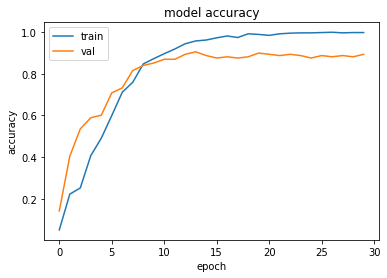

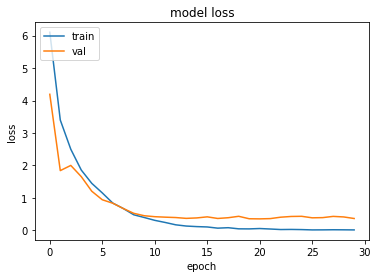

In [247]:
PlotModel(history=history)

In [248]:
model_nlp.evaluate(x=x_test, y=y_test, batch_size=128, verbose=2)

2/2 - 0s - loss: 0.2198 - acc: 0.9333 - 61ms/epoch - 31ms/step


[0.21977631747722626, 0.9333333373069763]